<a href="https://colab.research.google.com/github/ilham-mukti/Machine-Learning/blob/main/PCA/Latihan_PCA_1_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jcopml

In [2]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from skopt import BayesSearchCV
from xgboost import XGBRegressor, XGBClassifier

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp, random_search_params as rsp
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease
from jcopml.plot import plot_missing_value, plot_confusion_matrix, plot_correlation_matrix
from jcopml.tuning.space import Integer, Real

pd.options.display.max_columns = 100

In [3]:
datas = pd.read_csv("/content/breast_cancer.csv")
datas.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
datas.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [5]:
357 / (357+212)

0.6274165202108963

In [6]:
datas.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
X = datas.drop(columns='target')
y = datas.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [8]:
preprocessor = ColumnTransformer([
    ('num_data', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA()),
    ('algo', SVC(max_iter=500))
])

parameter = {
    'pca__n_components': Integer(1, 30),
    'pca__whiten': [True, False],
    'algo__C': Real(low=-3, high=3, prior='log-uniform'),
    'algo__gamma': Real(low=-3, high=3, prior='log-uniform')}

model = RandomizedSearchCV(pipeline, parameter, n_iter=50, cv=3, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.3s finished


(0.9736263736263736, 0.9736842105263158)

In [9]:
model.best_params_

{'algo__C': 3.907967156822884,
 'algo__gamma': 0.008632008168602547,
 'pca__n_components': 19,
 'pca__whiten': True}

# Menentukan Jumlah PCA (Jika tanpa Tuning) -> Cumulative Explained Variance

In [10]:
pca = PCA().fit(X_train)

Text(0, 0.5, 'Cumulative Explained Variance')

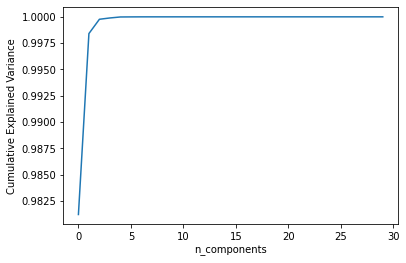

In [11]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variance")

In [12]:
# Artinya sampe dikompres jadi 5 pun informasinya tidak berkurang banyak, coba kita tes

In [13]:
preprocessor = ColumnTransformer([
    ('num_data', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA(n_components=5, whiten=True)),
    ('algo', SVC(max_iter=500))
])

parameter = {
    'algo__C': Real(low=-3, high=3, prior='log-uniform'),
    'algo__gamma': Real(low=-3, high=3, prior='log-uniform')}

model = RandomizedSearchCV(pipeline, parameter, n_iter=50, cv=3, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.9s finished


(0.9692307692307692, 0.9649122807017544)